In [1]:
import pandas as pd

In [3]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [4]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


- 누락된 값이 있다면 그 데이터를 버리거나 평균값으로 채운 후 사용할 수 있다. 어떤 방식이 최선인지는 미리 알기 어렵다. 두 가지 모두 시도. 여기에서도 항상 훈련 세트의 통계 값으로 테스트 세트를 변환한다는 것을 잊지 말자. 즉 훈련 세트의 평균값으로 테스트 세트의 누락된 값을 채워야 한다.

In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


- 여기서 알 수 있는 것은 알코올 도수와 당도, pH 값의 스케일이 다르다는 것입니다.
사이킷런의 StandardScaler클래스를 사용해 특성을 표준화해야겠군요. 그 전에 머저 판다스 데이터프레임을 넘파이 배열로 바꾸고 훈련 세트와 테스트 세트로 나누겠습니다

In [7]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [10]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [14]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target)) # 훈련 세트
print(dt.score(test_scaled, test_target)) # 테스트 세트

0.996921300750433
0.8592307692307692


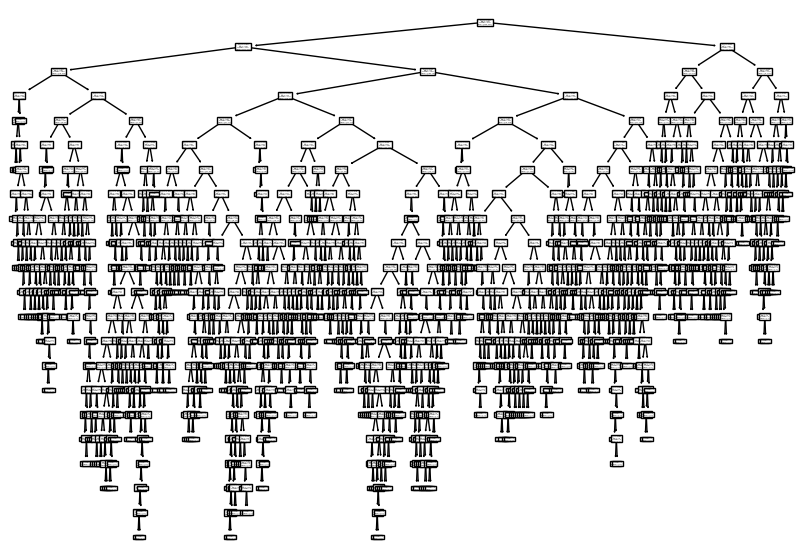

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

- 맨 위의 노드(node)를 루트 노드(root node), 맨 아래 끝에 달린 노드를 리프 노드(leaf node)
- 노드는 결정 트리를 구성하는 핵심 요소. 노드는 훈련 데이터의 특성에 대한 테스트를 표현한다.
예를 들어 현재 샘플의 당도가 -0.239보다 작거나 같은지 테스트합니다. 가지(branch)는 테스트의 결과(True, False)를 나타내며
일반적으로 하나의 노드는 2개의 가지를 가진다.

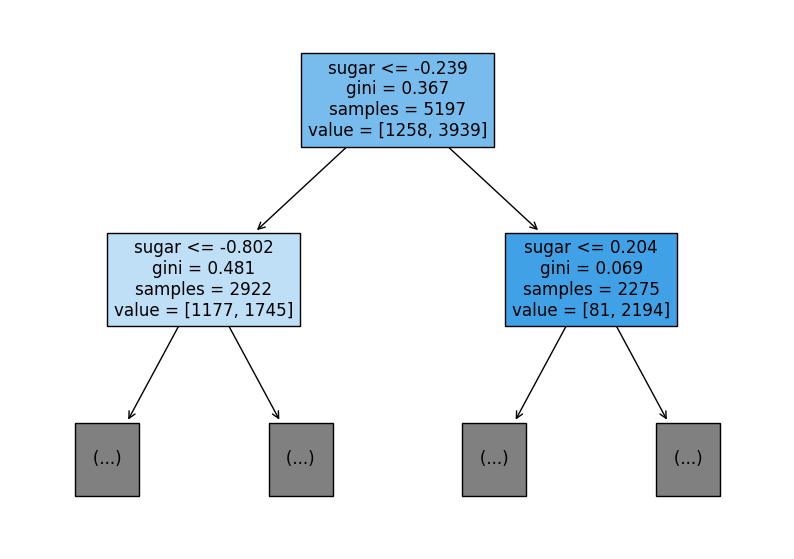

In [19]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 지니 불순도
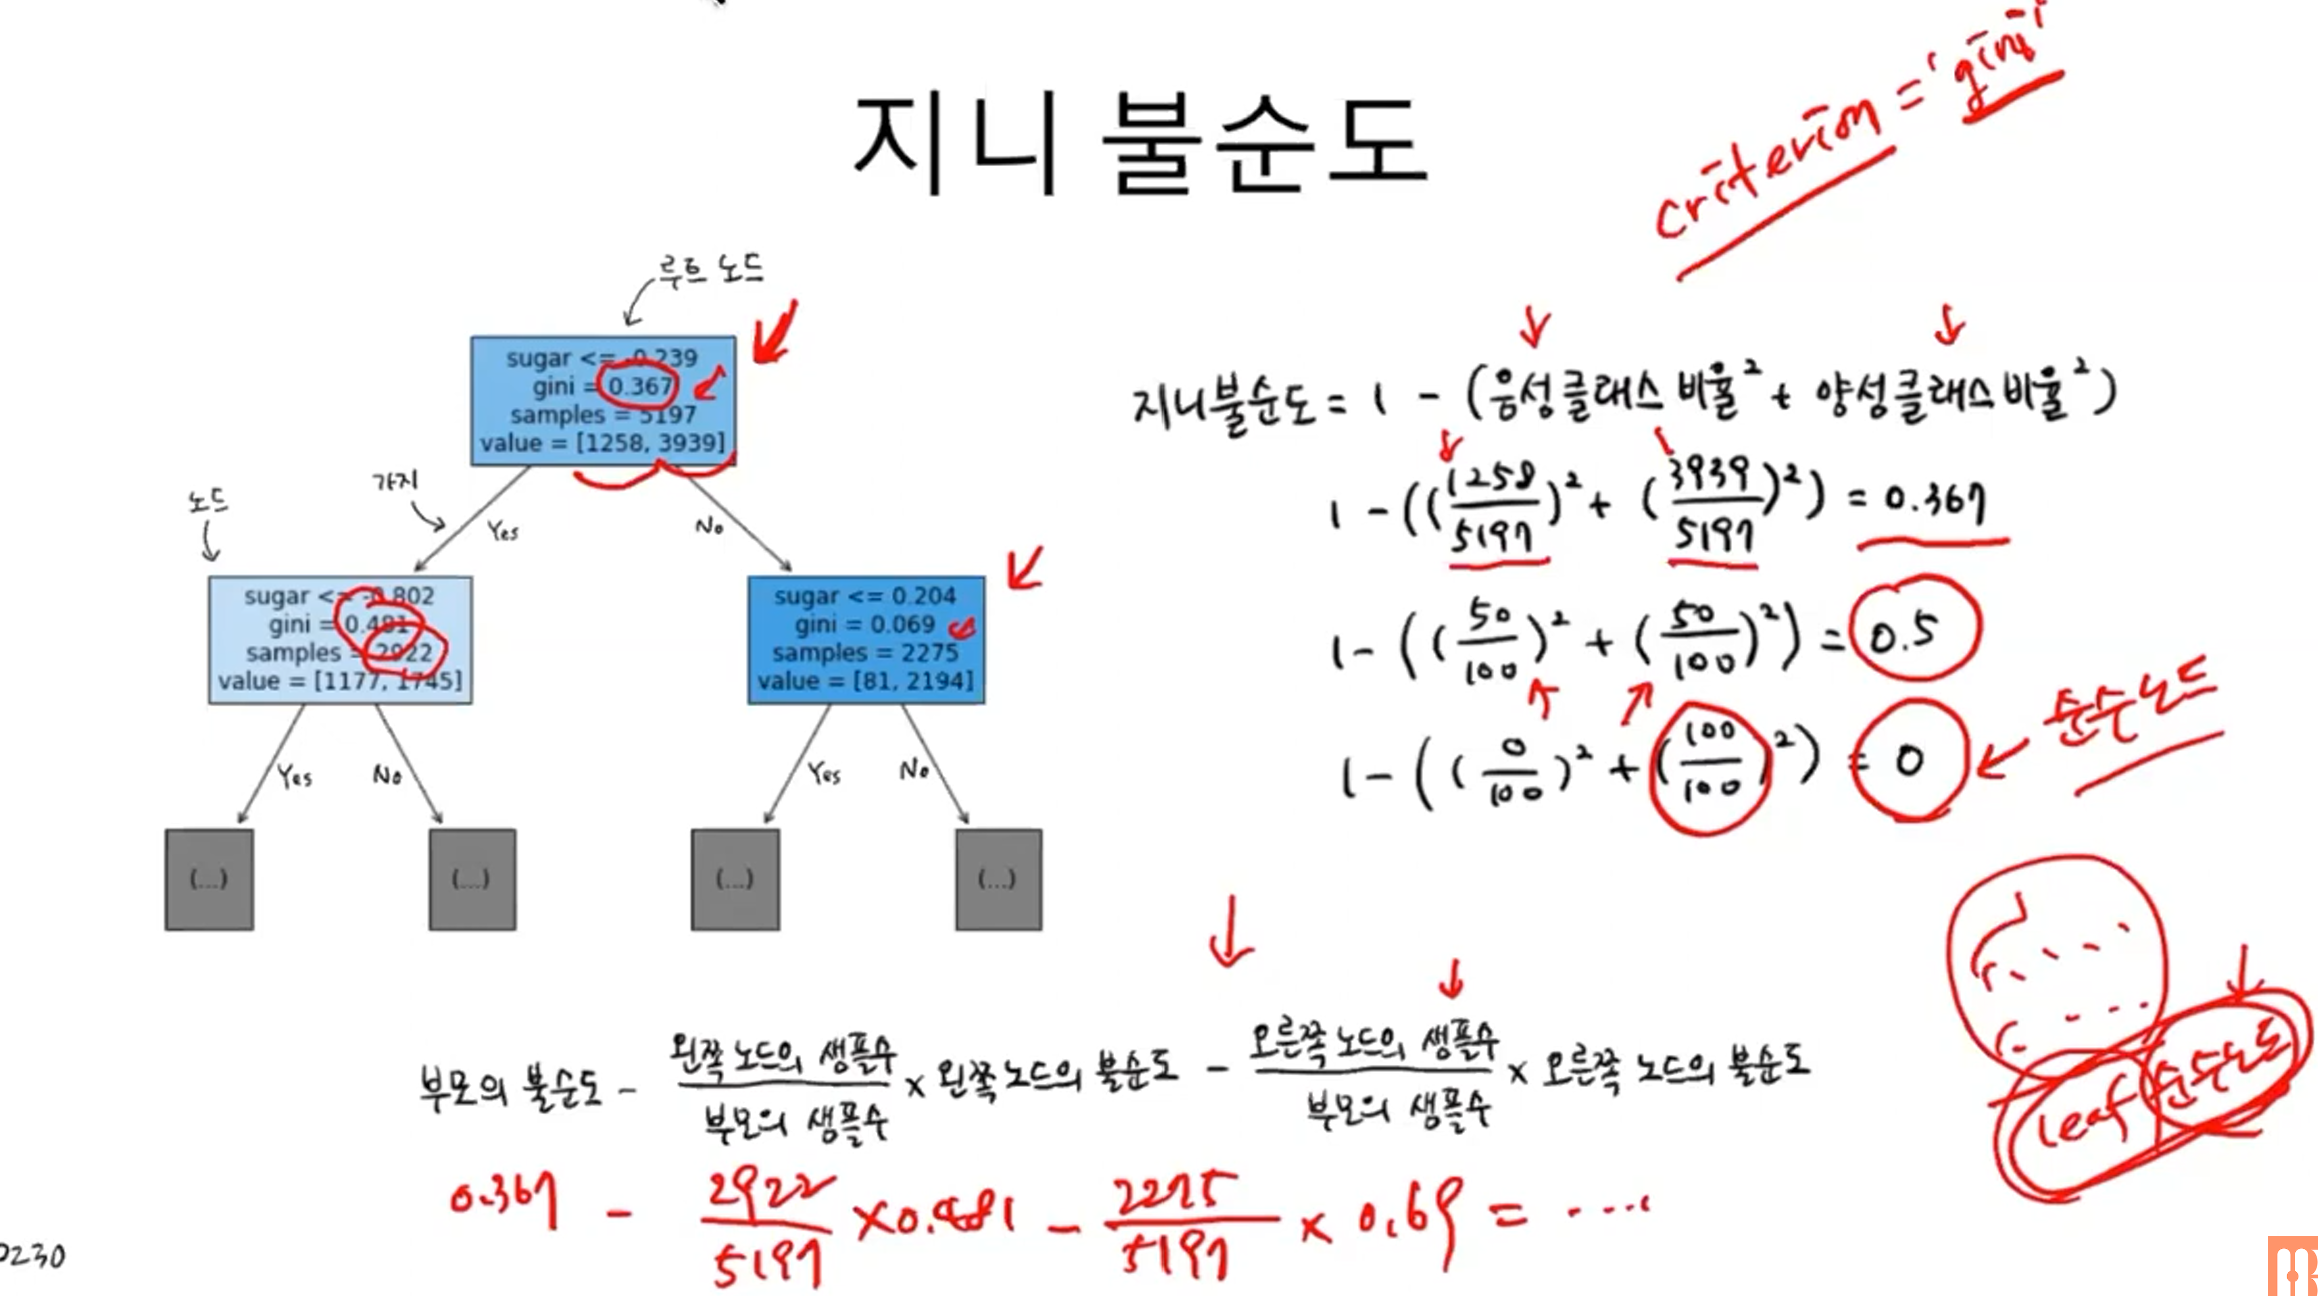

# 가지치기

In [20]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [21]:
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


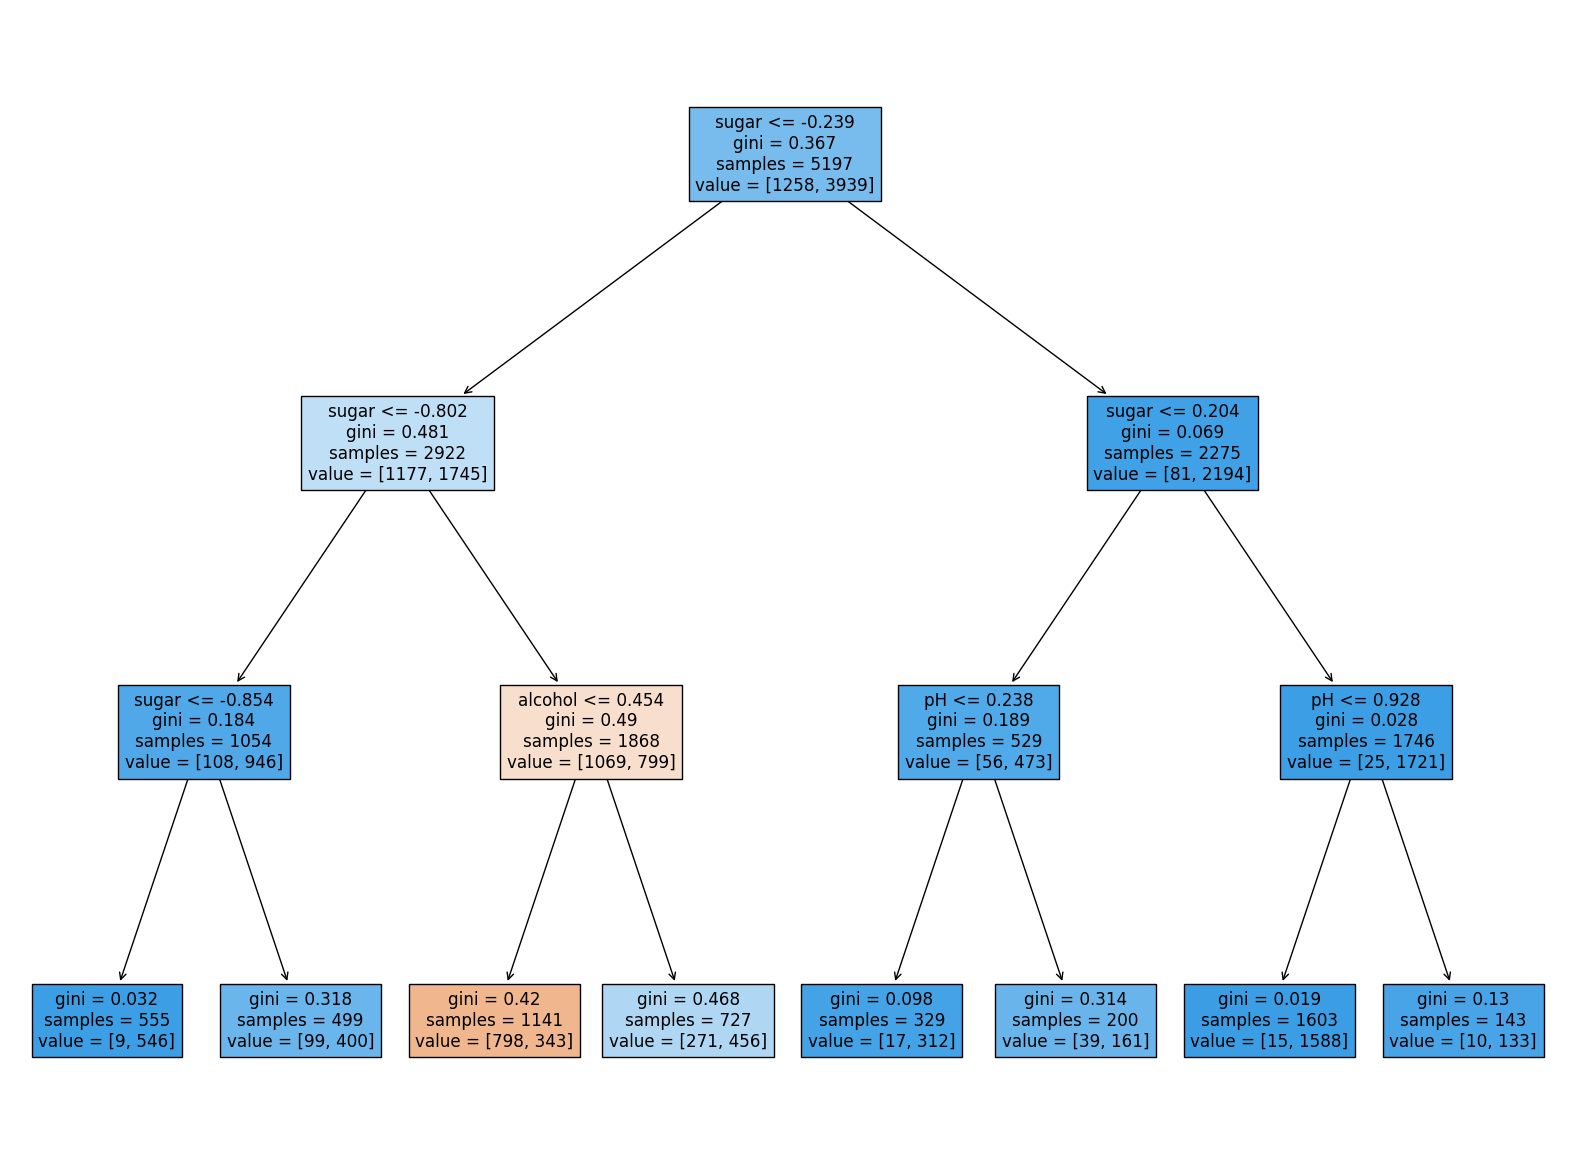

In [22]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True,
          feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [24]:
print(dt.feature_importances_) # 0.868로 sugar가 가장 중요하 특성이라는걸 알 수 있다

[0.12345626 0.86862934 0.0079144 ]


In [26]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


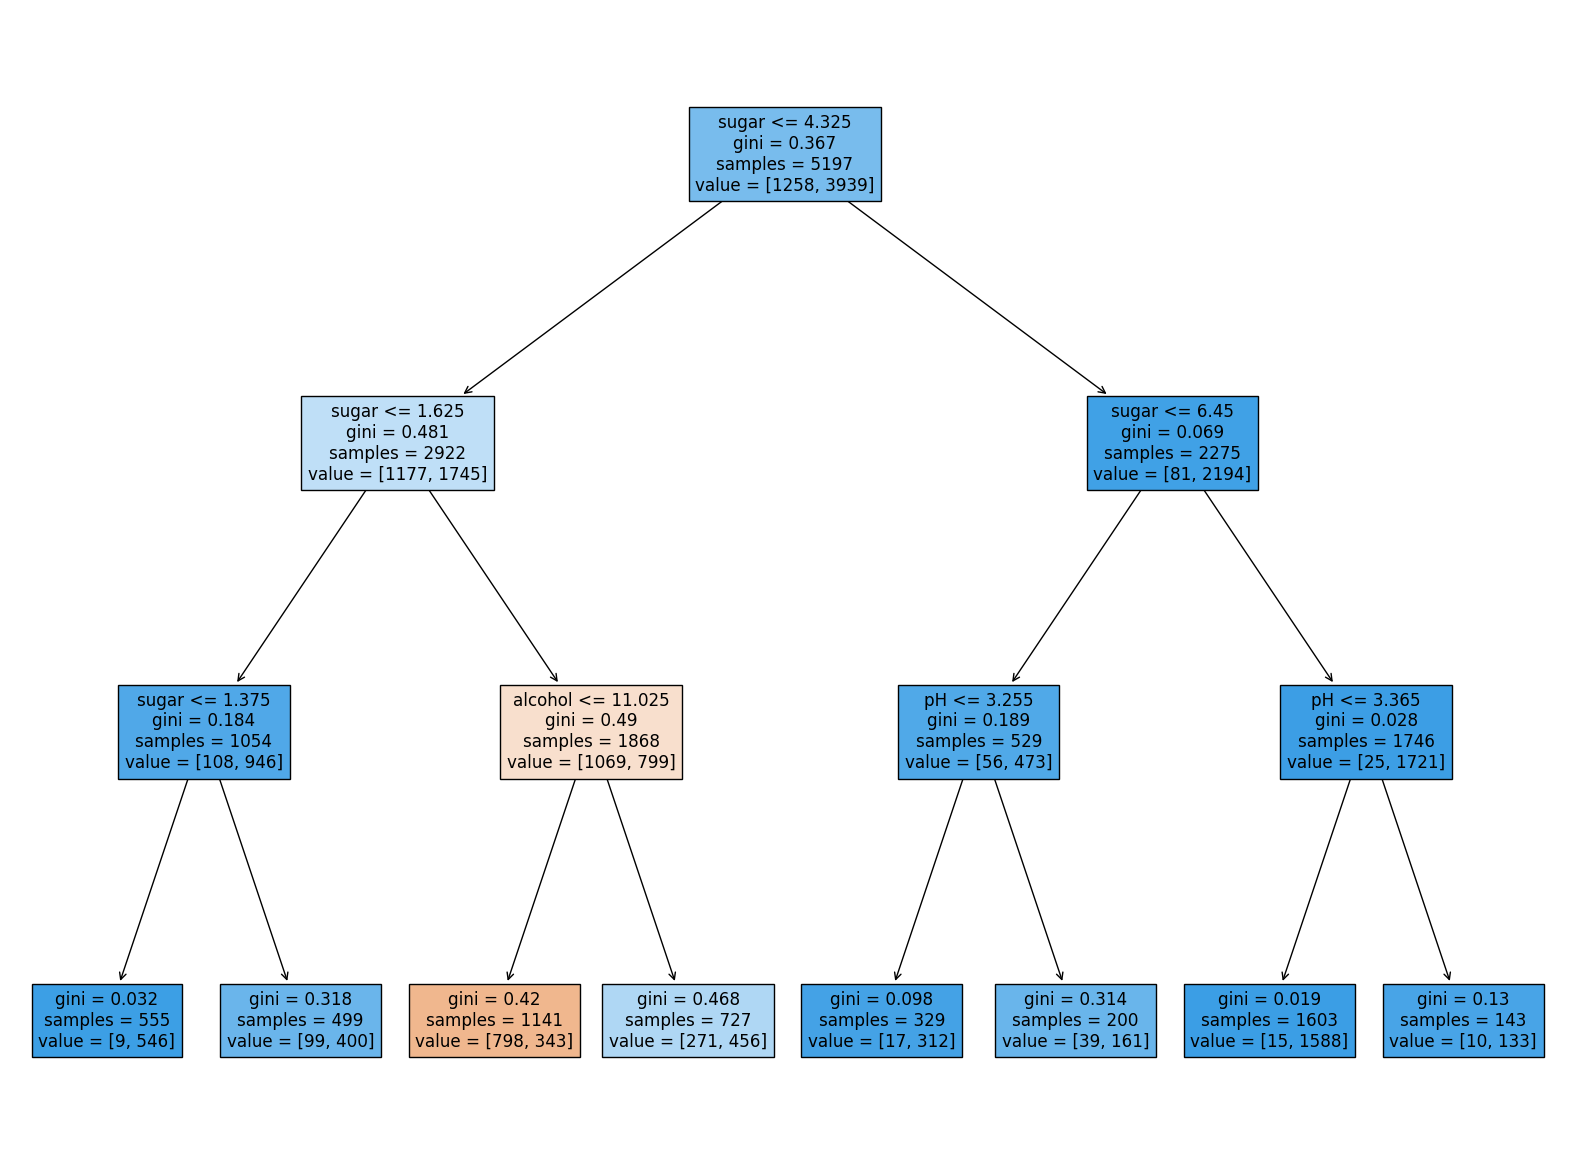

In [27]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [28]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
